This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [1]:
from aqua.diagnostics import GlobalBiases, PlotGlobalBiases

As a first step, we initialize the GlobalBias class for both the dataset and the reference data.


In [2]:
biases_ifs_nemo = GlobalBiases(model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG")

biases_era5 = GlobalBiases(model='ERA5', exp='era5', source='monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG")


Now we retrieve the data for the target variable (e.g., 'q') and compute its climatology.
The climatology will be stored as a class attribute and can optionally be saved as a NetCDF file.

In [3]:
var = 'q'

biases_ifs_nemo.retrieve(var=var)
biases_ifs_nemo.compute_climatology(seasonal=True, save_netcdf=False)

biases_era5.retrieve(var=var)
biases_era5.compute_climatology(seasonal=True, save_netcdf=False)

2026-01-26 12:22:16 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:22:16 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:22:16 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:22:16 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:22:17 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01-26 12:22:17 :: ConfigPath :: DEBUG    -> Catalog file is /users/tovazzie/.aqua/catalogs/climatedt-e25.1/catalog.yaml
2026-01-26 12:22:17 :: ConfigPath :: DEBUG    -> Machine file is /users/tovazzie/.aqua/catalogs/climatedt-e25.1/machine.yaml
2026-01-26 12:22:17 :: ConfigPath :: DEBU

Now we initialize the plotting class.  
The generated figures can optionally be saved as PNG or PDF files (enabled by default).

In [4]:
plot_biases = PlotGlobalBiases(save_pdf=False, save_png=False, loglevel='DEBUG')

Let's plot the climatology of variable 'q' at 180 hPa for the IFS-NEMO data:

2026-01-26 12:23:20 :: Global Biases :: INFO     -> Plotting climatology.
2026-01-26 12:23:20 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:20 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01-26 12:23:20 :: ConfigPath

2026-01-26 12:23:21 :: plot_single_map :: DEBUG    -> Adding coastlines
2026-01-26 12:23:21 :: cbar get label :: DEBUG    -> Using Specific humidity as colorbar label
2026-01-26 12:23:21 :: cbar get label :: DEBUG    -> Adding units to colorbar label
2026-01-26 12:23:21 :: plot_single_map :: DEBUG    -> Setting colorbar label to Specific humidity [kg kg$^{-1}$]
2026-01-26 12:23:21 :: set map title :: DEBUG    -> Explicit title provided: Climatology of Specific humidity for IFS-NEMO historical-1990 at 180 hPa
2026-01-26 12:23:21 :: plot_single_map :: DEBUG    -> Setting title to Climatology of Specific humidity for IFS-NEMO historical-1990 at 180 hPa
2026-01-26 12:23:21 :: plot_single_map :: DEBUG    -> Returning figure and axes


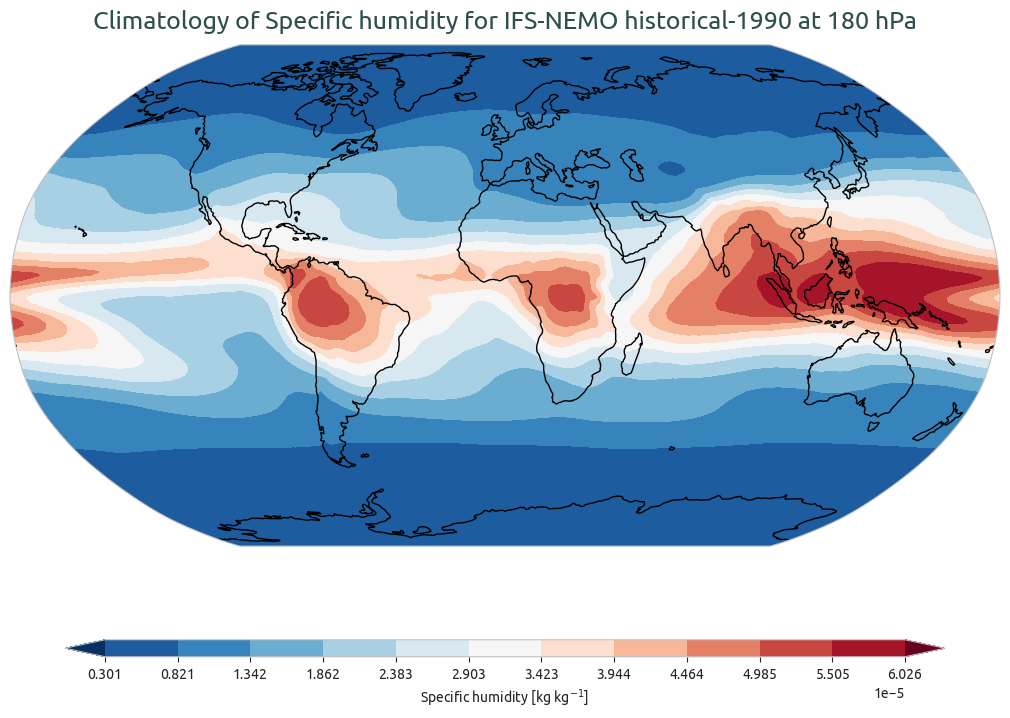

In [5]:
plot_biases.plot_climatology(data=biases_ifs_nemo.climatology, var=var, plev=18000)

Now we plot the total bias map for variable 'q' between IFS-NEMO data and the reference dataset ERA5:


2026-01-26 12:23:22 :: Global Biases :: INFO     -> Plotting global biases.
2026-01-26 12:23:22 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:22 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:22 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:23:22 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:23:22 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:22 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:22 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01-2

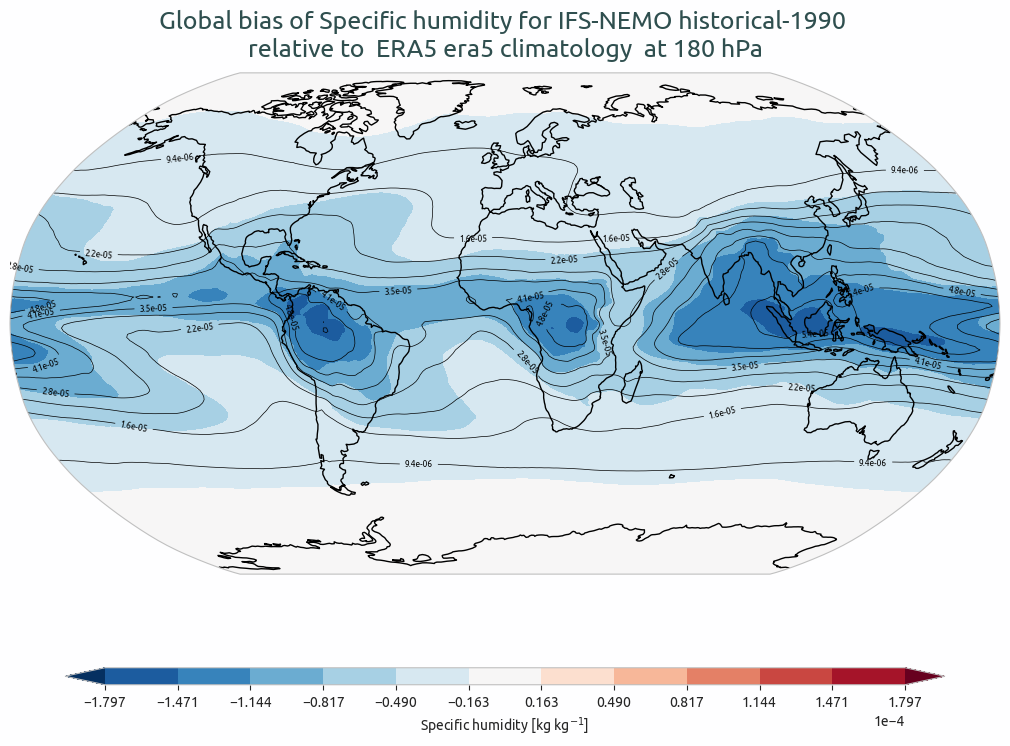

In [6]:
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000)

We can also do a seasonal analysis:

2026-01-26 12:23:23 :: Global Biases :: INFO     -> Plotting seasonal biases.
2026-01-26 12:23:23 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:23 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:23 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:23:23 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:23:23 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:23 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:23 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01

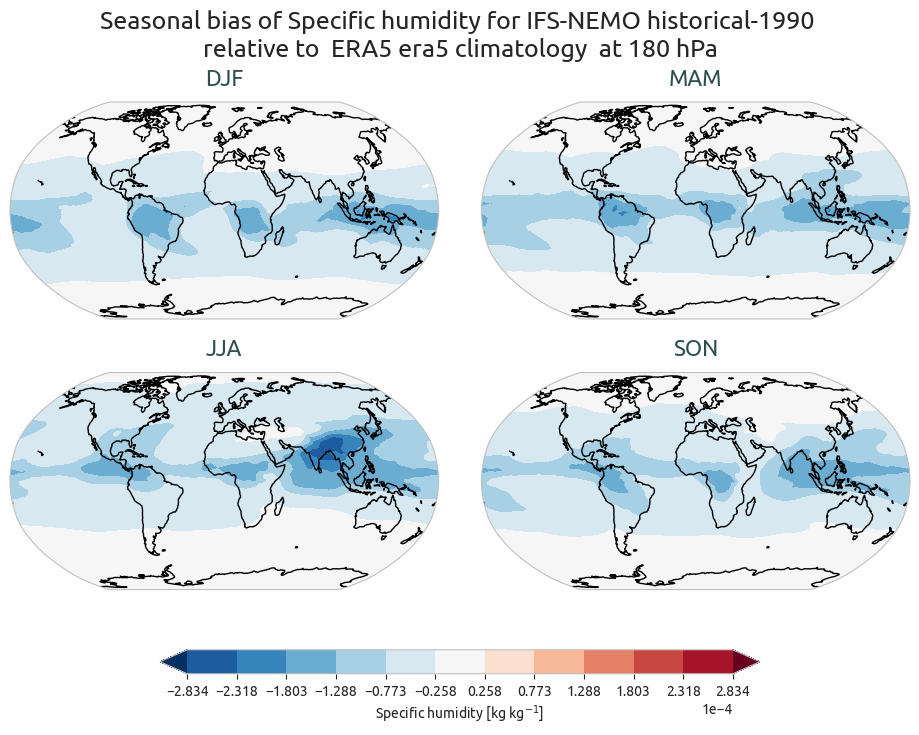

In [7]:
plot_biases.plot_seasonal_bias(data=biases_ifs_nemo.seasonal_climatology, data_ref=biases_era5.seasonal_climatology, var=var, plev=18000)

Finally, we can plot the vertical bias profile as a function of pressure levels:

2026-01-26 12:23:26 :: Global Biases :: INFO     -> Plotting vertical biases for variable: q
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Catalog file is /users/tovazzie/.aqua/catalogs/climatedt-e25.1/catalog.yaml
2026-01-26 12:23:26 :: ConfigPath :: DEBUG    -> Machine file is /users/t

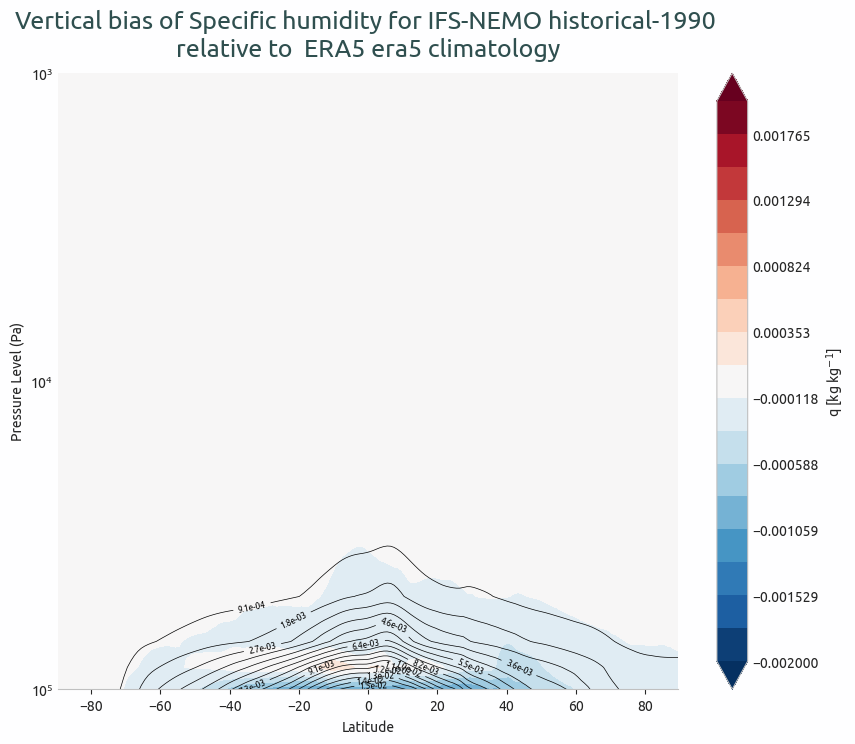

In [8]:
plot_biases.plot_vertical_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var,
                                vmin= -0.002, vmax= 0.002)

Different projections can be used to plot the bias maps. The default is `ccrs.Robinson`, but many others are available (see 'src/aqua/util/projections.py' for the full list). 

2026-01-26 12:23:27 :: Global Biases :: INFO     -> Plotting global biases.
2026-01-26 12:23:27 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:27 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-01-26 12:23:27 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:23:27 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:23:27 :: ConfigPath :: DEBUG    -> Catalog found in /users/tovazzie/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:27 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'ci', 'obs']
2026-01-26 12:23:27 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2026-01-2

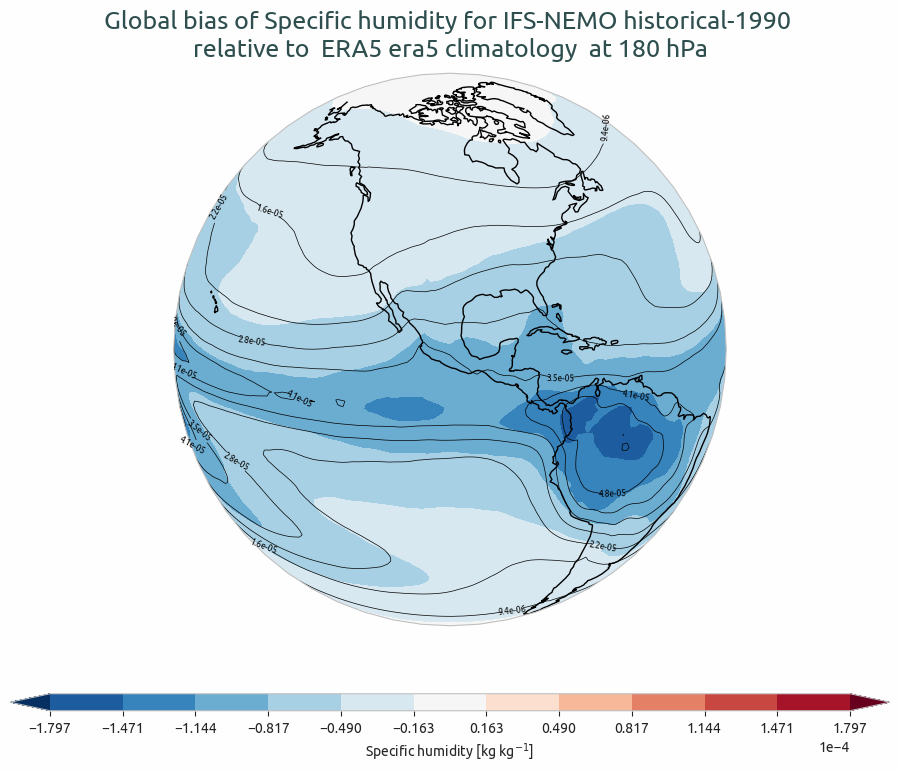

In [9]:
projection = "nearside"
projection_params = {
    "central_longitude": -100,
    "central_latitude": 20,
    "satellite_height": 35785831
}

plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000, proj=projection,
                      proj_params=projection_params)

The diagnostic is also able to handle the computation of user-defined formulae:

2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/tovazzie/.aqua
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Configuration file found in /users/tovazzie/.aqua/config-aqua.yaml
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Catalog file is /users/tovazzie/.aqua/catalogs/climatedt-phase1/catalog.yaml
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Machine file is /users/tovazzie/.aqua/catalogs/climatedt-phase1/machine.yaml
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to unknown
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to unknown
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Browsing catalog climatedt-phase1 ...
2026-01-26 12:26:16 :: ConfigPath :: DEBUG    -> Catalog file 

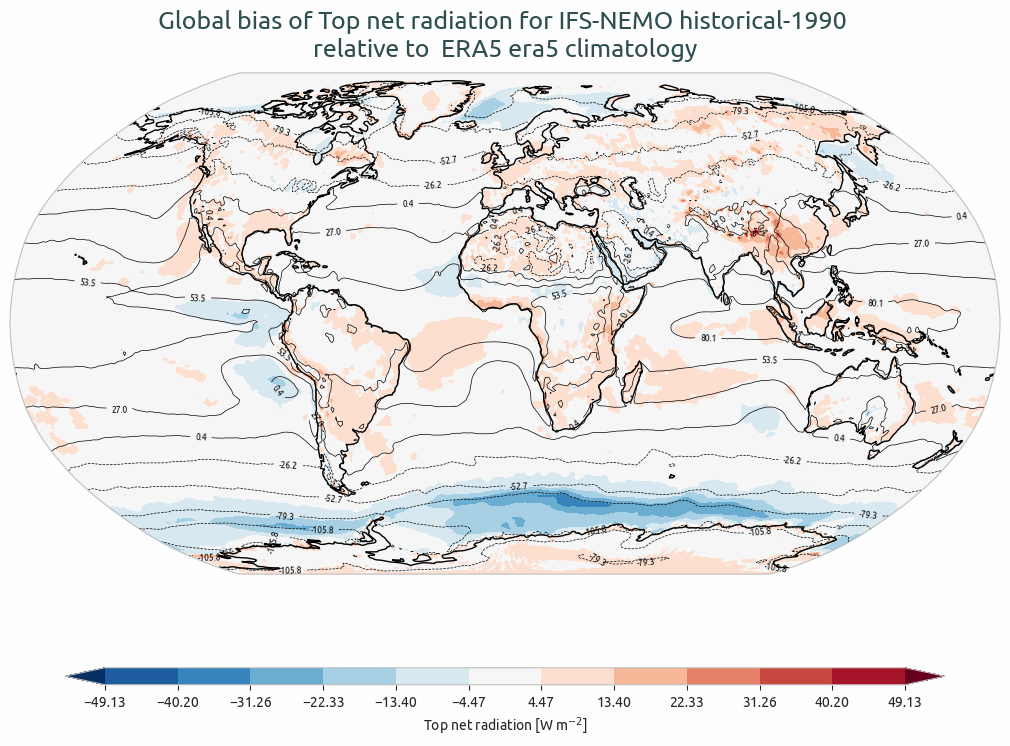

In [11]:
var = 'tnlwrf+tnswrf'
long_name = 'Top net radiation'
short_name = 'tnr'

biases_ifs_nemo.retrieve(formula=True, var=var, long_name=long_name, short_name=short_name)
biases_ifs_nemo.compute_climatology(save_netcdf=False)

biases_era5.retrieve(var=var, formula=True, long_name=long_name, short_name=short_name)
biases_era5.compute_climatology(save_netcdf=False)

plot_biases = PlotGlobalBiases(save_pdf=False, save_png=False, loglevel='DEBUG')
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=short_name, plev=None)